# Plotting probability densities for particles on a ring

One of the more useful things we can do with a probability density is visualize it. This helps us better understand the often complex equations we get from superposition states. In the third problem for this homework set, you produced an analytical solution for a probability density that resulted from the superposition of two $L_z$ eigenstates. In this notebook, we will numerically find the same solution and plot it. Then you will create functions that will take these eigenstates, time evolve them, and compute the probability density. You will then use those functions to plot the probability density for a variety of superposition states.

## Imports

We are likely to only need `numpy`, `matplotlib`, and `mpl_toolkits` for this, but if you want to include other imports, please do below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('ggplot')

## 1. An example

To start, we will need a superposition state. Let's use one we have from problem 3:

$$\vert \psi \rangle = \sqrt{\dfrac{1}{5}}\vert 2 \rangle - i\sqrt{\dfrac{4}{5}}\vert -1 \rangle$$

But we need the position representation to be able to plot this. Let's remember that $\vert m \rangle \doteq \dfrac{1}{\sqrt{2\pi}}e^{i m \phi}$. So that we have,

$$\vert \psi \rangle = \sqrt{\dfrac{1}{5}} \dfrac{1}{\sqrt{2\pi}}e^{i 2\phi} - i\sqrt{\dfrac{4}{5}} \dfrac{1}{\sqrt{2\pi}}e^{-i \phi}$$


### 1.1 Construct the state vector in the position representation

We can start by constructing each state vector in the position representation. While we could combine them now, we need to time evolve them and they will each need to be time evolved differently.

In [2]:
phi = np.arange(0,2*np.pi,0.01) ## Make an array that goes around the ring

## Create psi1 in steps: amplitude, Lz eigenvalue, then psi1
A1 = np.sqrt(1./5)
m1 = 2
psi1 = A1*np.sqrt(1./(2*np.pi))*np.exp(1j*m1*phi)

## Create psi2 in steps: amplitude, Lz eigenvalue, then psi2
A2 = -1j*np.sqrt(4./5)
m2 = -1
psi2 = A2*np.sqrt(1./(2*np.pi))*np.exp(1j*m2*phi)

### 1.2 Plot the wavefunctions

<font size=8 color="#009600">&#9998;</font> Do This.

* Now that we have constructed the two wavefuntions, plot them vs. $\phi$. *Recall that you will need to plot the real and imaginary parts separately.*

In [3]:
## your code here

### 1.3 Time evolve the states

Now, we know that the eigenstates of $L_z$ are also eigenstates of the Hamiltonian for the particle on a ring. And these have eigenvalues of $E_m = \dfrac{m^2\hbar^2}{2I}$ where $I=\mu r_0^2$. Let's set $\hbar$ and $I$ equal to 1 for the sake of argument, so that $E_m = \dfrac{m^2}{2}$ for our example.

We can construct the time evolved state a given time $t$. For this first case, let's choose $t=0$.

In [5]:
t=0

timeEvol1 = np.exp(1j*m1**2/2*t)
timeEvol2 = np.exp(1j*m2**2/2*t)

psi1_t = psi1*timeEvol1
psi2_t = psi2*timeEvol2

### 1.4 Plot the time evolved wavefunctions

<font size=8 color="#009600">&#9998;</font> Do This.

* Now that we have constructed the two time evolved wavefuntions, plot them vs. $\phi$. *Recall that you will need to plot the real and imaginary parts separately.*
* Try different values of $t$. Do you notice anything about the behavior of the wavefunctions? Might be best to look at just one of them for this.

In [6]:
## your code here

### 1.5 Probability density

Everything we have done so far has been to develop the probability density $P(t) = \vert \psi(t) \vert^2$. We have stuck with a notation that makes that calculation straightforward.

$$\psi(t) = \psi_1(t) + \psi_2(t)$$

We can also plot it in a regular 2D plot and a 3D plot. The 3D plot really illustrates that we are on a ring.

In [15]:
## Add the two eigenstates to get the total state
psi_t = psi1_t + psi2_t

## Compute the probability density

prob = ((psi_t.conj().T * psi_t).real)

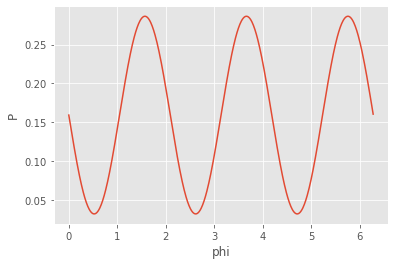

In [16]:
## Make 2D plot

plt.plot(phi,prob)
plt.xlabel('phi')
plt.ylabel('P');

Text(0.5, 0, 'P')

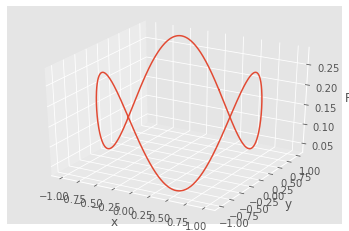

In [17]:
## Make 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

z = prob
x = np.sin(phi)
y = np.cos(phi)

ax.plot3D(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('P')

## 2. Make it generalized

Now that we have seen how we can numerically compute the probability density for a given superposition state, let's rework thtese steps into a set of functions that can take any superposition state and return the probaiblity desnity.

If you look back, the steps we took were:

1. Construct the eigenstates for given choices of $m$.
2. Time evolve each states.
3. Combine the states.
4. Compute the probability density.
5. Plot the probability density.

This suggests four functions:

* Function 1 - takes $A$, $m$, and $phi$ and returns the eigenstate $Ae^{im\phi}$.
* Function 2 - takes $m$ and $t$ and returns the phase factor for the energy $e^{im^2/2t}$
* Function 3 - combines the results of function 1 and 2 to return a time evolved state
* Function 4  - returns the probability density given a superposition state

Note that between the actions taken by function 3 and 4 you will need to construct a superposition state.

<font size=8 color="#009600">&#9998;</font> Do This.

* Write the functions necessary to compute the probability density for an arbitrary superposition state. That is, things should work for any choice of $m$ and $t$. 
* Test your functions on the state: $\vert \psi \rangle = \sqrt{\dfrac{1}{3}}\vert 3 \rangle + i\sqrt{\dfrac{2}{3}}\vert -1 \rangle$. Recall these are eigenstates of $L_z$.
* Plot the resulting probability densities in 2D and 3D space.

In [18]:
### your code here